In [3]:
!pip install chart_studio

  Using cached chart_studio-1.1.0-py3-none-any.whl (64 kB)


In [5]:
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68727 sha256=e6e980d47b595c226081b93a3574203517fbd385eb382bb9f8145591332b3945
  Stored in directory: c:\users\91735\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from chart_studio.plotly import plot,iplot 
import cufflinks as cf 
import seaborn as sns 

%matplotlib inline 

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## AUTOMATED EDA

In [4]:
!pip install pandas-profiling

In [5]:
import pandas_profiling as pf 

In [6]:
pf.ProfileReport(df)

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dropna(how='any',inplace = True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Feature Engineering 

#### Converting the Datae_of Journey to its appropriate format as datatime with regards to day and month 

In [9]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [10]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey'] =(df['Date_of_Journey']).dt.day
df['Month_of_Journey'] =(df['Date_of_Journey']).dt.month

In [11]:
df.drop(['Date_of_Journey'],axis = 1, inplace = True)

In [12]:
df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [13]:
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [14]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [15]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [16]:
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [17]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [18]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [19]:
#  Duration column

duration = df['Duration'].str.split(' ',expand =True)
duration[1].fillna('00m',inplace = True)                     #fill the 'na' with 00m
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) # getting rig of ' h'
df['duration_min']=duration[1].apply(lambda x: x[:-1]) # getting rid of 'm'

In [20]:
df.drop(['Duration'],axis = 1,inplace = True)

In [21]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


### Count of Airlines 

In [22]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### Airlines VS Price

C:\Users\91735\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

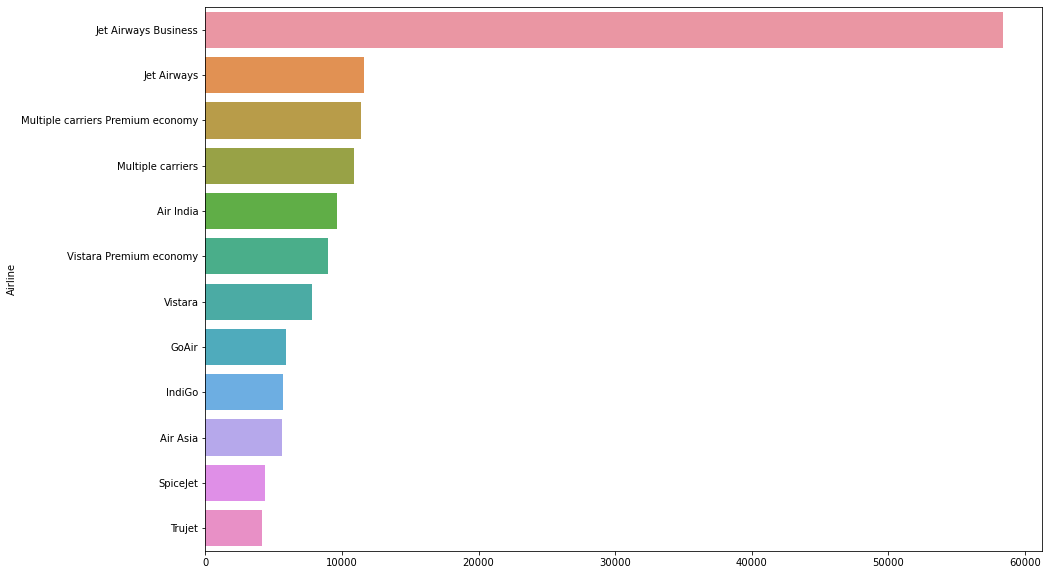

In [23]:
Airprice=df.groupby(['Airline'])['Price'].mean().sort_values(ascending = False)
plt.figure(figsize=(15,10))
sns.barplot(Airprice.values,Airprice.index,orient = 'h')
plt.xticks(rotation = 0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

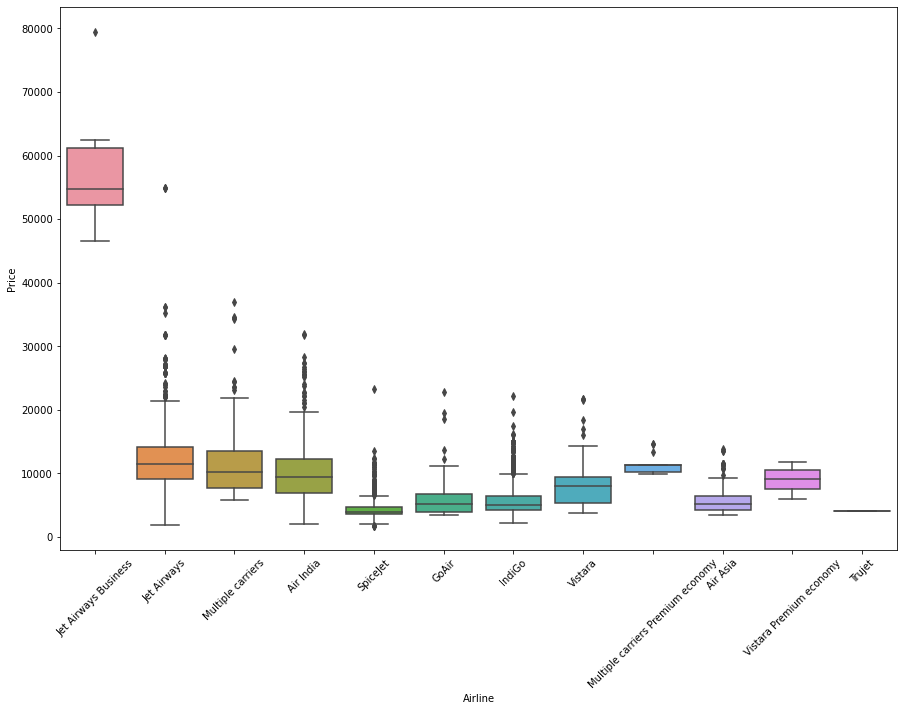

In [24]:
plt.figure(figsize = (15,10))
sns.boxplot(y='Price',x = 'Airline',data = df.sort_values('Price',ascending = False))
plt.xticks(rotation = 45)

* Jet Airways has the highest Price 

### Price based on Stops 

In [25]:
df.groupby(['Airline','Total_Stops'])['Price'].mean().sort_values(ascending = False )

Airline                            Total_Stops
Jet Airways Business               1 stop         62844.250000
                                   2 stops        49387.500000
Air India                          4 stops        17686.000000
Multiple carriers                  3 stops        17292.750000
                                   2 stops        14809.395349
Jet Airways                        2 stops        13387.247467
                                   1 stop         12512.741223
Air India                          3 stops        12208.054054
                                   2 stops        12092.779101
Multiple carriers Premium economy  1 stop         11418.846154
Multiple carriers                  1 stop         10711.316157
Vistara                            1 stop          9641.148837
Air India                          1 stop          9041.509259
Vistara Premium economy            non-stop        8962.333333
IndiGo                             2 stops         7507.526316
        

[Text(0, 0, 'IndiGo'),
 Text(1, 0, 'Air India'),
 Text(2, 0, 'Jet Airways'),
 Text(3, 0, 'SpiceJet'),
 Text(4, 0, 'Multiple carriers'),
 Text(5, 0, 'GoAir'),
 Text(6, 0, 'Vistara'),
 Text(7, 0, 'Air Asia'),
 Text(8, 0, 'Vistara Premium economy'),
 Text(9, 0, 'Jet Airways Business'),
 Text(10, 0, 'Multiple carriers Premium economy'),
 Text(11, 0, 'Trujet')]

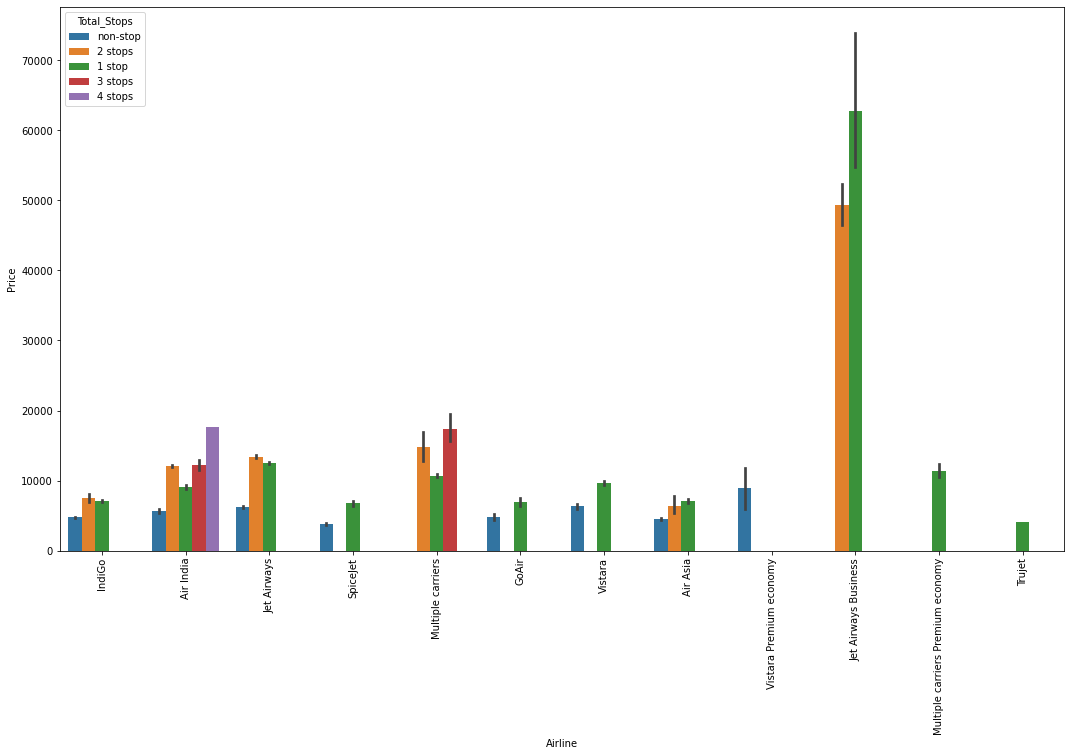

In [26]:
plt.figure(figsize = (18,10))
ax=sns.barplot(x = df['Airline'] , y = df['Price'] , hue = df['Total_Stops'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [27]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

### Source VS Price 

<AxesSubplot:xlabel='Source', ylabel='Price'>

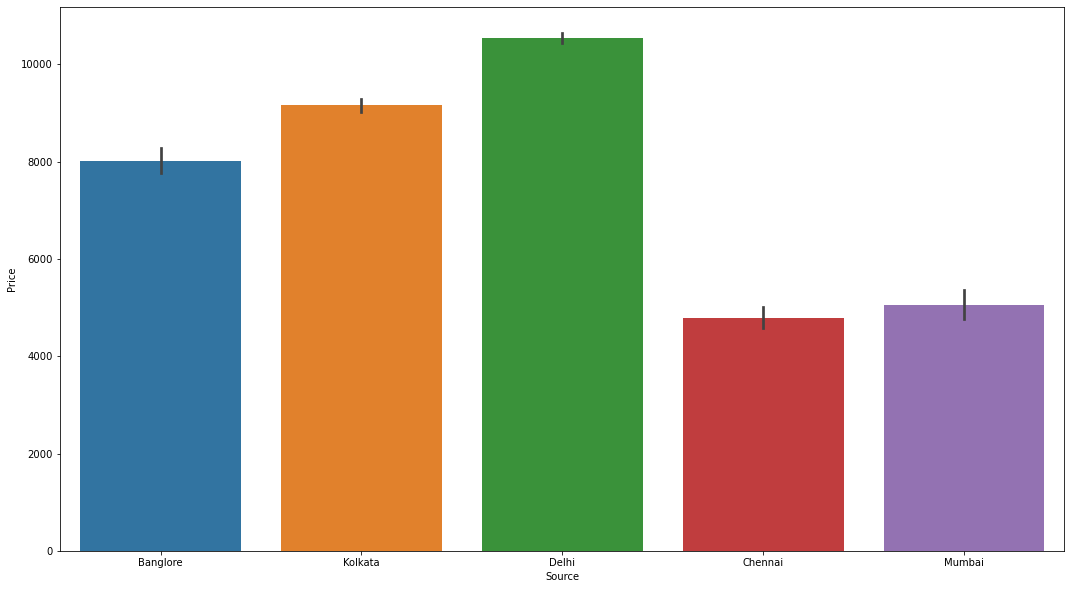

In [28]:
plt.figure(figsize = (18,10))
sns.barplot(x = 'Source' , y = 'Price' , data = df)

### Destination VS Price 

<AxesSubplot:xlabel='Destination', ylabel='Price'>

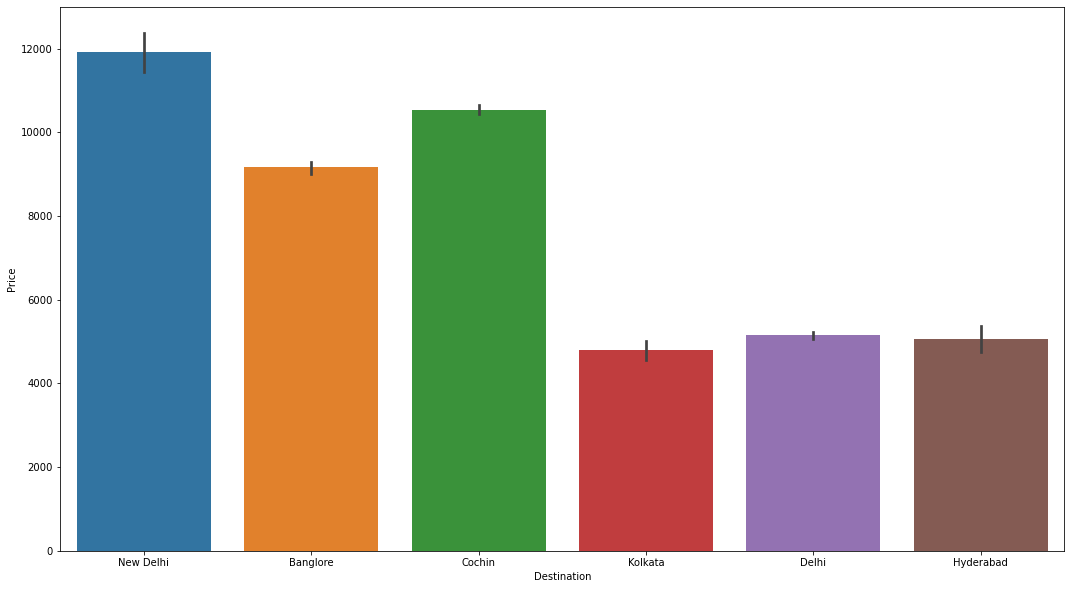

In [29]:
plt.figure(figsize = (18,10))
sns.barplot(x = 'Destination' , y = 'Price' , data = df)

In [30]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [31]:
for i in df:
    df.replace('New Delhi','Delhi',inplace = True)

In [32]:
df['Destination'].value_counts()


Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

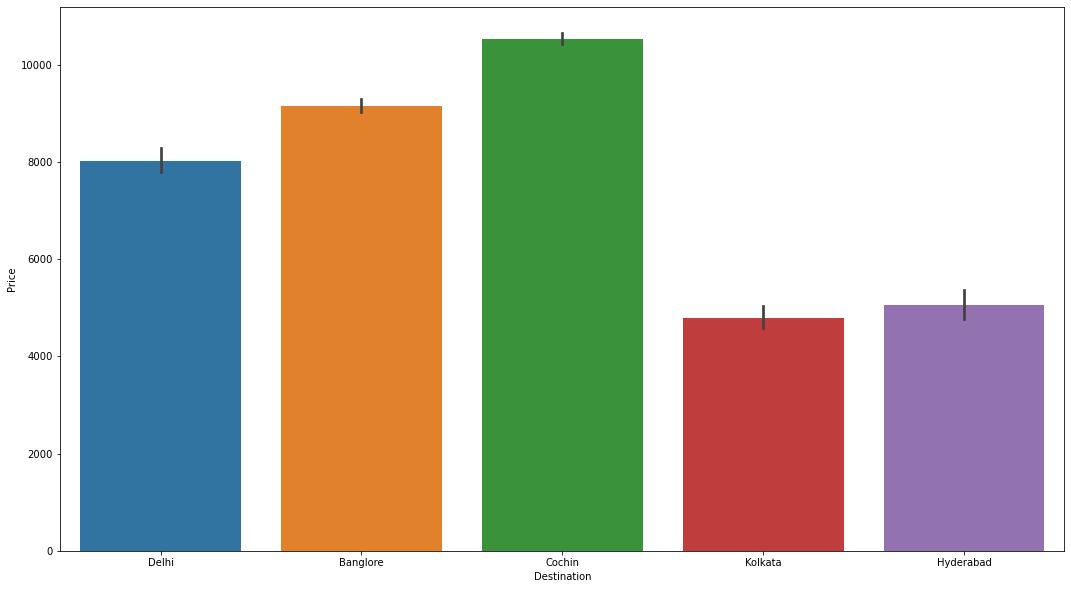

In [33]:
plt.figure(figsize = (18,10))
sns.barplot(x = 'Destination' , y = 'Price' , data = df)

<AxesSubplot:>

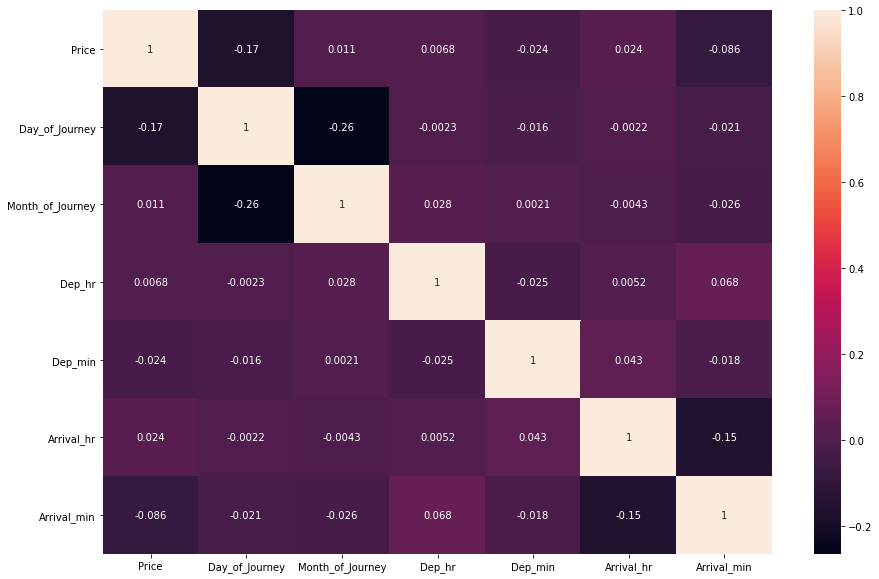

In [34]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True )

### Appy One-Hot Encoding on the categorical variables

In [41]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0 ,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
air_dummy = pd.get_dummies(df['Airline'],drop_first = True )
source_dest_dummy = pd.get_dummies(df[['Source','Destination']],drop_first = True )
df = pd.concat([air_dummy,source_dest_dummy,df],axis= 1)

In [42]:
df.drop(['Airline','Source','Destination'],inplace = True,axis = 1)
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [43]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [44]:
df.shape

(10682, 31)

In [45]:
df['Total_Stops'].tail(50)

10633    1
10634    2
10635    1
10636    1
10637    0
10638    1
10639    3
10640    1
10641    0
10642    2
10643    1
10644    1
10645    1
10646    2
10647    0
10648    2
10649    0
10650    1
10651    1
10652    1
10653    1
10654    0
10655    0
10656    0
10657    1
10658    0
10659    0
10660    0
10661    1
10662    2
10663    2
10664    0
10665    0
10666    1
10667    1
10668    2
10669    1
10670    2
10671    0
10672    2
10673    2
10674    1
10675    0
10676    1
10677    0
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, dtype: int64

## Test Data 

In [46]:
df_test = pd.read_excel('Test_set.xlsx')

In [47]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [48]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month
#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute
#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute
#Splitting duration  time
durat = df_test['Duration'].str.split(' ',expand =True)
durat[1].fillna('00m',inplace = True)                     #fill the 'na' with 00m
df_test['duration_hr']=durat[0].apply(lambda x: x[:-1]) # getting rig of ' h'
df_test['duration_min']=durat[1].apply(lambda x: x[:-1]) # getting rid of 'm'
#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)
#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non stop':0, '2 stops':2, '1 stop':1, '3 stops':3,
'4 stops':4})
air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)

In [49]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [50]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 28)


### Spliting the Training data to x and y 

In [51]:
x=df.drop(['Route', 'Price','Additional_Info'],axis=1) 
y=df['Price']

In [52]:
x.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,0,1,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,0,1,3,1,16,50,21,35,4,45


In [53]:
x.isna().sum()

Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Source_Chennai                       0
Source_Delhi                         0
Source_Kolkata                       0
Source_Mumbai                        0
Destination_Cochin                   0
Destination_Delhi                    0
Destination_Hyderabad                0
Destination_Kolkata                  0
Total_Stops                          0
Day_of_Journey                       0
Month_of_Journey                     0
Dep_hr                               0
Dep_min                              0
Arrival_hr                           0
Arrival_min              

## Model Building 

### ExtraTreeRegressor

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size = 0.2 , random_state = 50 )

In [50]:
!pip install scipy

In [55]:
# Preparing Extra Tree Regression
from sklearn.ensemble import ExtraTreesRegressor

In [56]:
ET_model = ExtraTreesRegressor(n_estimators = 120 )
ET_model.fit(x_train , y_train)
y_predict = ET_model.predict(x_test)

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7706779373603555

### Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(x_train,y_train)
Y_predict = RF_model.predict(x_test)
r2_score(y_predict,y_test)

0.7296673071839319

### Hyperparameter tuning 

In [61]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 80 , stop = 1500 , num = 10 )]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(6,45,num = 5 )]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]



In [68]:
# create random grid
rand_grid={'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf}

In [69]:
rf=RandomForestRegressor()

In [71]:
rCV=RandomizedSearchCV(estimator=rf,
                                            param_distributions=rand_grid,
                                          scoring='neg_mean_squared_error',
                                         n_iter=10,
                                          cv=3,
                                          random_state=42, 
                                          n_jobs = 1)

In [72]:
rCV.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [73]:
rf_pred = rCV.predict(x_test)
rf_pred

array([12457.80672567,  4286.91277629,  6119.33011448, ...,
       11635.25836472,  9704.48973097,  8664.05362166])

In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1156.6965879706784
MSE 3946719.798363597


In [75]:
r2_score(y_test,y_predict)

0.7706779373603555

In [76]:
!pip install catboost

In [77]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

In [78]:
cat.fit(x_train,y_train)

Learning rate set to 0.05718
0:	learn: 4466.5316537	total: 172ms	remaining: 2m 51s
1:	learn: 4319.1952920	total: 174ms	remaining: 1m 27s
2:	learn: 4170.0874200	total: 177ms	remaining: 58.8s
3:	learn: 4033.1061207	total: 179ms	remaining: 44.6s
4:	learn: 3909.5332929	total: 181ms	remaining: 36s
5:	learn: 3788.8771850	total: 183ms	remaining: 30.3s
6:	learn: 3677.5795256	total: 185ms	remaining: 26.2s
7:	learn: 3585.9715553	total: 186ms	remaining: 23.1s
8:	learn: 3499.6424958	total: 188ms	remaining: 20.7s
9:	learn: 3408.9602975	total: 190ms	remaining: 18.8s
10:	learn: 3329.4018172	total: 192ms	remaining: 17.3s
11:	learn: 3258.4306577	total: 194ms	remaining: 16s
12:	learn: 3188.9732731	total: 196ms	remaining: 14.9s
13:	learn: 3126.6519374	total: 198ms	remaining: 13.9s
14:	learn: 3064.8092738	total: 200ms	remaining: 13.2s
15:	learn: 3011.9738031	total: 203ms	remaining: 12.5s
16:	learn: 2960.0953295	total: 204ms	remaining: 11.8s
17:	learn: 2917.5532184	total: 207ms	remaining: 11.3s
18:	learn: 

163:	learn: 1942.7228013	total: 482ms	remaining: 2.46s
164:	learn: 1940.9073624	total: 483ms	remaining: 2.45s
165:	learn: 1938.0460170	total: 485ms	remaining: 2.44s
166:	learn: 1935.3286398	total: 487ms	remaining: 2.43s
167:	learn: 1932.9545795	total: 489ms	remaining: 2.42s
168:	learn: 1931.6124443	total: 491ms	remaining: 2.41s
169:	learn: 1929.5307514	total: 493ms	remaining: 2.41s
170:	learn: 1927.4963218	total: 495ms	remaining: 2.4s
171:	learn: 1925.4669384	total: 497ms	remaining: 2.39s
172:	learn: 1924.3200339	total: 499ms	remaining: 2.39s
173:	learn: 1922.7154464	total: 501ms	remaining: 2.38s
174:	learn: 1920.9589969	total: 503ms	remaining: 2.37s
175:	learn: 1919.1457003	total: 505ms	remaining: 2.36s
176:	learn: 1918.1069516	total: 507ms	remaining: 2.36s
177:	learn: 1916.2214512	total: 509ms	remaining: 2.35s
178:	learn: 1913.5124519	total: 510ms	remaining: 2.34s
179:	learn: 1911.4800432	total: 512ms	remaining: 2.33s
180:	learn: 1909.3957573	total: 514ms	remaining: 2.32s
181:	learn:

333:	learn: 1732.5282950	total: 791ms	remaining: 1.58s
334:	learn: 1731.4241971	total: 793ms	remaining: 1.57s
335:	learn: 1729.9668045	total: 796ms	remaining: 1.57s
336:	learn: 1729.1779869	total: 798ms	remaining: 1.57s
337:	learn: 1729.0852102	total: 799ms	remaining: 1.56s
338:	learn: 1728.1482089	total: 801ms	remaining: 1.56s
339:	learn: 1726.7783890	total: 803ms	remaining: 1.56s
340:	learn: 1726.2547590	total: 805ms	remaining: 1.56s
341:	learn: 1724.9434243	total: 808ms	remaining: 1.55s
342:	learn: 1724.9309222	total: 810ms	remaining: 1.55s
343:	learn: 1723.3258449	total: 812ms	remaining: 1.55s
344:	learn: 1722.4287769	total: 814ms	remaining: 1.55s
345:	learn: 1721.3414872	total: 816ms	remaining: 1.54s
346:	learn: 1720.2014300	total: 818ms	remaining: 1.54s
347:	learn: 1719.6390060	total: 819ms	remaining: 1.53s
348:	learn: 1718.3140866	total: 821ms	remaining: 1.53s
349:	learn: 1717.3394270	total: 824ms	remaining: 1.53s
350:	learn: 1716.4750581	total: 825ms	remaining: 1.52s
351:	learn

497:	learn: 1606.8330984	total: 1.1s	remaining: 1.11s
498:	learn: 1606.8248170	total: 1.11s	remaining: 1.11s
499:	learn: 1606.2762544	total: 1.11s	remaining: 1.11s
500:	learn: 1605.7741311	total: 1.11s	remaining: 1.11s
501:	learn: 1604.7832547	total: 1.11s	remaining: 1.1s
502:	learn: 1604.0246624	total: 1.11s	remaining: 1.1s
503:	learn: 1603.4539587	total: 1.12s	remaining: 1.1s
504:	learn: 1602.6018182	total: 1.12s	remaining: 1.1s
505:	learn: 1601.9053810	total: 1.12s	remaining: 1.09s
506:	learn: 1601.7180851	total: 1.12s	remaining: 1.09s
507:	learn: 1601.1230396	total: 1.13s	remaining: 1.09s
508:	learn: 1601.0062587	total: 1.13s	remaining: 1.09s
509:	learn: 1600.4310960	total: 1.13s	remaining: 1.08s
510:	learn: 1600.0121639	total: 1.13s	remaining: 1.08s
511:	learn: 1598.7379098	total: 1.14s	remaining: 1.09s
512:	learn: 1597.8127483	total: 1.14s	remaining: 1.08s
513:	learn: 1597.8080633	total: 1.15s	remaining: 1.08s
514:	learn: 1597.1631563	total: 1.15s	remaining: 1.08s
515:	learn: 159

662:	learn: 1513.6007305	total: 1.42s	remaining: 719ms
663:	learn: 1513.0918781	total: 1.42s	remaining: 717ms
664:	learn: 1512.7977061	total: 1.42s	remaining: 715ms
665:	learn: 1512.4112519	total: 1.42s	remaining: 713ms
666:	learn: 1512.1090491	total: 1.42s	remaining: 710ms
667:	learn: 1511.3236721	total: 1.42s	remaining: 708ms
668:	learn: 1510.6262787	total: 1.43s	remaining: 706ms
669:	learn: 1510.6236099	total: 1.43s	remaining: 703ms
670:	learn: 1509.8371387	total: 1.43s	remaining: 701ms
671:	learn: 1509.2874087	total: 1.43s	remaining: 699ms
672:	learn: 1509.2834648	total: 1.43s	remaining: 696ms
673:	learn: 1509.2783078	total: 1.43s	remaining: 694ms
674:	learn: 1508.6425759	total: 1.44s	remaining: 691ms
675:	learn: 1507.9908505	total: 1.44s	remaining: 689ms
676:	learn: 1507.4353868	total: 1.44s	remaining: 687ms
677:	learn: 1506.6989363	total: 1.44s	remaining: 684ms
678:	learn: 1506.1226434	total: 1.44s	remaining: 682ms
679:	learn: 1505.6428927	total: 1.44s	remaining: 680ms
680:	learn

831:	learn: 1446.7329213	total: 1.73s	remaining: 349ms
832:	learn: 1446.4104391	total: 1.73s	remaining: 347ms
833:	learn: 1445.9325543	total: 1.73s	remaining: 345ms
834:	learn: 1445.7856855	total: 1.74s	remaining: 343ms
835:	learn: 1445.5632822	total: 1.74s	remaining: 341ms
836:	learn: 1445.4024114	total: 1.74s	remaining: 339ms
837:	learn: 1444.9772217	total: 1.74s	remaining: 337ms
838:	learn: 1444.9731111	total: 1.74s	remaining: 335ms
839:	learn: 1444.6856308	total: 1.75s	remaining: 332ms
840:	learn: 1444.6836141	total: 1.75s	remaining: 330ms
841:	learn: 1444.2557845	total: 1.75s	remaining: 328ms
842:	learn: 1443.9635568	total: 1.75s	remaining: 326ms
843:	learn: 1443.5793488	total: 1.75s	remaining: 324ms
844:	learn: 1443.2765572	total: 1.75s	remaining: 322ms
845:	learn: 1442.9203917	total: 1.76s	remaining: 320ms
846:	learn: 1442.5857041	total: 1.76s	remaining: 318ms
847:	learn: 1441.7708073	total: 1.76s	remaining: 316ms
848:	learn: 1441.5323425	total: 1.76s	remaining: 314ms
849:	learn

In [79]:
cat_pred=cat.predict(x_test)

In [80]:
r2_score(y_test,cat_pred)

0.8301928561140887

In [82]:
!pip install lightgbm

In [84]:
x_train[['duration_hr','duration_min']]=x_train[['duration_hr','duration_min']].astype(int)
x_test[['duration_hr','duration_min']]=x_test[['duration_hr','duration_min']].astype(int)

In [85]:
from lightgbm import LGBMRegressor
lgb_model = LGBMRegressor()
lgb_model.fit(x_train,y_train)

LGBMRegressor()

In [87]:
lgb_pred=lgb_model.predict(x_test)
r2_score(y_test,lgb_pred)

0.8030064936005559

In [89]:
!pip install xgboost

In [91]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(x_train,y_train)
xgb_pred=xgb_model.predict(x_test)
r2_score(y_test,xgb_pred)

0.8212496825906317

### we will choose catboost 

In [92]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [94]:
deploy_df = df.drop(['Route','Additional_Info'],axis = 1)

In [95]:
deploy_df.to_csv('deploy_df')